### Notebook 3_7

## Continuous-Time to Discrete-Time Systems

#### Student Learning Outcomes

* Learn the open-loop control system design based on requirements.
* Learn to convert a continuous-time system to a discrete-time system.
--------------------

In [1]:
# import at first
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Task 1: Open-Loop Control System</h2>
</div>


When we apply an input—such as a unit step—to a physical system, the system responds based on its inherent physical properties.

However, if we want to change that response, for example:
- Make the system react faster  
- Reduce the overshoot  
- Minimize oscillations  
- And more...

Then we need to introduce **Control**.

A basic approach to this is the **Open-Loop Control System**, where we add a new system called a **controller**. This controller is placed before the original system and is designed to adjust the overall system behavior.

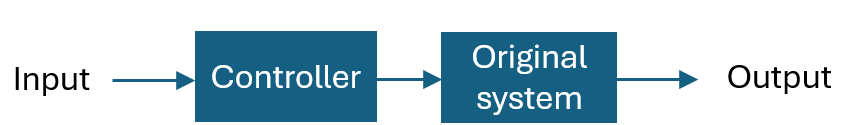

----------------
#### Example of Controller Design

Consider you have a physical system in second order. 

$$H_{sys}(s) = \frac{25.6}{s^2 + 0.688s + 2.56}$$

Its unit step response can be seen using the next code cell.

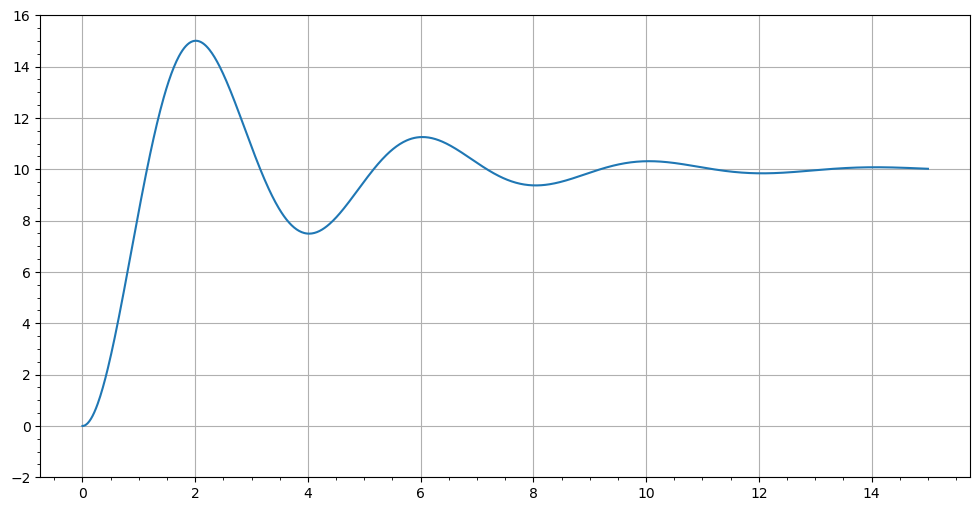

In [2]:
# Run this code directly
num_sys = [25.6]
den_sys = [1, 0.688, 2.56]
H_sys = sig.lti(num_sys, den_sys)
t = np.linspace(0, 15, 1000)
_, y_sys = sig.step(H_sys, T=t)
plt.figure(figsize=(12, 6))
plt.plot(t, y_sys)
plt.ylim(-1, 15)
plt.ylim(-2, 16)
plt.minorticks_on()
plt.grid()

Read from the response plot
* **Percentage Overshoot (PO)**: 50%
* **Peak Time**: 2 seconds

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Read Plot: 1 pt</strong>
</span>

---------
Now, we are not satisfied with such response of the original system. We want to design a open-loop controller and change the overall system response.

The specific **Design Requirements** for the overall system response are:
* **Percentage Overshoot (PO)**: reduces to 20%
* **Peak Time**: keep the same


To do so, we can set the controller's transfer function as:
$$H_c(s) = \frac{s^2 + 0.688s + 2.56}{s^2+2\zeta\omega_n s+\omega_n^2}$$

Since they are cascade connected, the overall transfer function becomes:
$$H(s) = H_c(s)H_{sys}(s)=\frac{s^2 + 0.688s + 2.56}{s^2+2\zeta\omega_n s+\omega_n^2}\frac{25.6}{s^2 + 0.688s + 2.56} =\frac{25.6}{s^2+2\zeta\omega_n s+\omega_n^2}$$

Now it is your job to:
* Calculate the $\zeta$ and $\omega_n$ based on the **Design Requirements**.
* Write down the expression of controller $H_c(s)$, and overall transfer function $H(s)$

**Answer**

$$\zeta = -\frac{\ln\left(\frac{PO}{100}\right)}{\sqrt{\pi^2 + \left[\ln\left(\frac{PO}{100}\right)\right]^2}}$$

In [8]:
PO = 20
ln_value = np.log(20/100)
zeta = -ln_value/np.sqrt(np.pi**2+ln_value**2)
print(zeta)

0.4559498107691261


$$t_p = \frac{\pi}{\omega_n\sqrt{1-\zeta^2}}$$

In [10]:
w_n = np.pi/2/np.sqrt(1-zeta**2)
print(w_n)

1.7649288084133588


In [11]:
print(2*zeta*w_n)
print(w_n**2)

1.6094379124341003
3.1149736987673986


$$H_c(s) = \frac{s^2 + 0.688s + 2.56}{s^2+1.609 s+3.115}$$

$$H(s) = \frac{25.6}{s^2+1.609 s+3.115}$$

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Result: 1 pt</strong>
</span>

Then verify your overall transfer function $H(s)$ using this code cell. You should see the response match the Design Requirements.

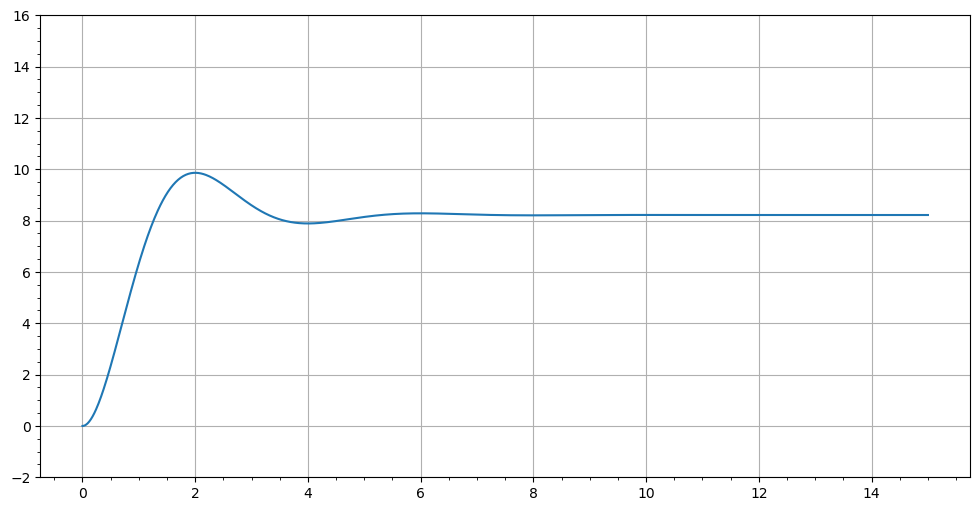

In [12]:
# Fill the first 2 lines and run
num_all = [25.6]
den_all = [1, 1.609, 3.115]
H_all = sig.lti(num_all, den_all)
t = np.linspace(0, 15, 1000)
_, y_all = sig.step(H_all, T=t)
plt.figure(figsize=(12, 6))
plt.plot(t, y_all)
plt.ylim(-1, 15)
plt.ylim(-2, 16)
plt.minorticks_on()
plt.grid()

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Plot: 0.5 pt</strong>
</span>

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Task 2: From Continuous-Time Controller to Digital Implementation</h2>
</div>

In **Task 1**, you designed a controller $H_c(s)$ in the **continuous-time**. This controller changes the overall system response.

However, in real-world applications, many modern control systems are implemented on **digital hardware** like microcontrollers, DSPs, or embedded computers. Thus, you need to find a way to implement $H_c(s)$ with **discrete-time signals**.

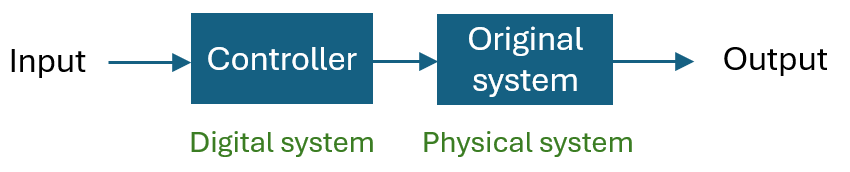

----

#### From $H(s)$ to Implementation

One common approach is to first **convert the continuous-time transfer function** $H(s)$ into a **discrete-time transfer function** $H(z)$.

After obtaining $H(z)$, you can express it as a **difference equation**. Then it can be directly implemented in code.


In Python's `scipy.signal`, the function `scipy.signal.cont2discrete()` is used to convert a **continuous-time transfer function** $H(s)$ into a **discrete-time transfer function** $H(z)$. 

It supports **several methods**, each based on a different mathematical approximation of how continuous-time behavior maps to discrete time. https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.cont2discrete.html

----------------
#### Example of Controller Implementation

We will continue the system problem in Task 1.

First, use `scipy.signal.cont2discrete()` to convert your $H_c(s)$ with:
* Sampling Period 0.1 second
* Use `bilinear` method
* print out the converted result

In [13]:
## Answer
sig.cont2discrete(([1, 0.688, 2.56], [1, 1.609, 3.115]), 0.1, 'bilinear')

(array([[ 0.95640887, -1.82607197,  0.89318738]]),
 array([ 1.        , -1.82352198,  0.85214625]),
 0.1)

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Python Result: 1 pt</strong>
</span>

Note, the function doesn't accept lti object. You should specify the first entry as a tuple: `sig.cont2discrete((num, den), ..., ...)`

The function gives 3 outputs
- `b = [b₀, b₁, ..., bₘ]` → $H(z)$ Numerator coefficients
- `a = [1, a₁, a₂, ..., aₙ]` → $H(z)$ Denominator coefficients
- `dt = Ts` → Sampling Time

So, the converted $H(z)$ transfer function is:
$$H(z) = \frac{Y(z)}{X(z)}=\frac{b_0 + b_1 z^{-1} + b_2 z^{-2} + \cdots + b_m z^{-m}}{1 + a_1 z^{-1} + a_2 z^{-2} + \cdots + a_n z^{-n}}$$

The difference equation can be obtained:
$$y[n] = b_0 x[n] + b_1 x[n-1] + b_2 x[n-2] + \cdots + b_m x[n-m] - a_1 y[n-1] - a_2 y[n-2] - \cdots - a_n y[n-n]$$

------
Now, it is your job to type the difference equation of the previous problem in a Markdown cell and then fill it in code.

**Answer**

$$H(z) = \frac{Y(z)}{X(z)}=\frac{0.9564 - 1.8260z^{-1} + 0.8932z^{-2}}{1 - 1.8235z^{-1}+0.8521z^{-2}}$$

$$Y(z) - 1.8235Y(z)z^{-1} + 0.8521 Y(z)z^{-2} = 0.9564x[n] - 1.8260X(z)z^{-1} +0.8932X(z)z^{-2}$$

$$y[n] - 1.8235y[n-1] + 0.8521 y[n-2] = 0.9564x[n] - 1.8260x[n-1] +0.8932x[n-2]$$

$$y[n]   = 0.9564x[n] - 1.8260x[n-1] +0.8932x[n-2] + 1.8235y[n-1] - 0.8521 y[n-2]$$

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Markdown Equation: 0.5 pt</strong>
</span>

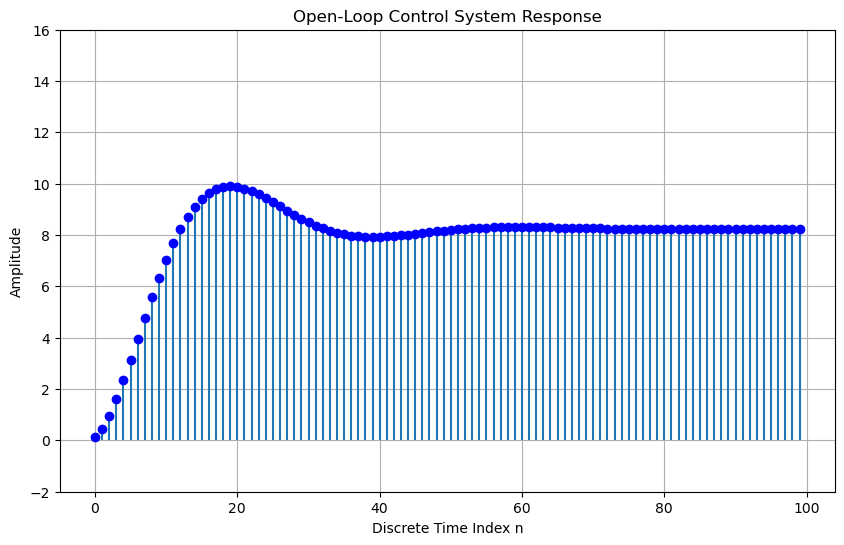

In [14]:
# You only need to fill the Controller difference equation part 
# Re-use continuous-time H_sys
# Sampling settings
Ts = 0.1
n_samples = 100

# Unit step input
x = np.ones(n_samples)

y = np.zeros(n_samples)      
y_all = np.zeros(n_samples)   
x_p = np.zeros(2)            

# Initial conditions
x_n_minus_1 = 0
x_n_minus_2 = 0
y_n_minus_1 = 0
y_n_minus_2 = 0

# Loop over time steps
for n in range(n_samples):
    x_n = x[n]  # Current input value

    # Controller difference equation
    y_n = (
        0.9564 * x_n +
        -1.8260 * x_n_minus_1 +
        0.8932 * x_n_minus_2 -
        -1.8235 * y_n_minus_1 -
        0.8521 * y_n_minus_2
    )

    # Update 
    x_n_minus_2 = x_n_minus_1
    x_n_minus_1 = x_n
    y_n_minus_2 = y_n_minus_1
    y_n_minus_1 = y_n

    y[n] = y_n  

    # Apply y[n] to the continuous-time plant over one sampling period
    t = np.linspace(0, Ts, 100)
    u_vec = y_n * np.ones_like(t)
    _, y_vec, x_vec = sig.lsim(H_sys, U=u_vec, T=t, X0=x_p)
    y_sampled = y_vec[-1]
    x_p = x_vec[-1]

    y_all[n] = y_sampled  

# Plotting
n = np.arange(n_samples)
plt.figure(figsize=(10, 6))
plt.ylim(-2, 16)
plt.stem(n, y_all, linefmt='tab:blue', markerfmt='bo', basefmt=' ')
plt.xlabel('Discrete Time Index n')
plt.ylabel('Amplitude')
plt.title('Open-Loop Control System Response')
plt.grid(True)

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Plot: 1 pt</strong>
</span>

----------
In your final plot, notice one index gap is 0.1 seconds. So 20 indexes correspond to 2 seconds, 100 indexes correspond to 10 seconds. 

Do you final plot still match the previous Design Requirements in Task 1?

If you **still have time in class**, explore other methods in `scipy.signal.cont2discrete()` for Task 2. Your final submission can be based on any of those methods, not limited to `bilinear`

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Submit in .pdf</h2>
</div>


